# customer shopping center Dataset 

Creating a project plan for a customer shopping center involves detailing the steps and components required to develop and implement a comprehensive solution. Below is an outline of the key elements to include in such a project:
Dataset Description

Type of Data
The dataset contains both numerical and categorical data related to customer shopping behavior.

File Format
The dataset is provided in an Excel file (customer_shopping_data.xls).

Columns
A brief description of some of the key columns in the dataset:

CustomerID: Unique identifier for each customer.

Type: Numerical
Significance: This column uniquely identifies each customer in the dataset, allowing for the tracking of individual shopping behaviors.
Gender: Gender of the customer (e.g., Male, Female).

Type: Categorical
Significance: Gender can be used to analyze shopping behaviors and preferences between different gender groups.
Age: Age of the customer.

Type: Numerical
Significance: Age can influence shopping habits and preferences. Analyzing age data can help identify trends among different age groups.
Annual Income (k$): Annual income of the customer in thousands of dollars.

Type: Numerical
Significance: Income levels can affect purchasing power and shopping preferences. This column is crucial for segmenting customers based on their income.
Spending Score : Score assigned by the shopping center based on customer behavior and spending nature.

Type: Numerical
Significance: The spending score is an important metric for understanding customer value and loyalty. Higher scores may indicate more frequent or higher value purchases.
Other Potential Columns:

Purchase History: Details of past purchases made by the customer.

Type: Categorical/Numerical
Significance: Analyzing purchase history can provide insights into customer preferences and buying patterns.
Membership Status: Indicates whether a customer is part of a loyalty program.

Type: Categorical
Significance: Membership data can help assess the impact of loyalty programs on shopping behavior.
Feedback: Customer feedback or ratings for products/services.

Type: Text/Categorical
Significance: Feedback can be used to improve products/services and understand customer satisfaction levels.


 Conclusion:
Developing a detailed project plan for a customer shopping center involves careful planning, collaboration, and execution to deliver a successful solution that meets customer needs and business objectives. By following a structured approach and leveraging best practices in software development and project management, you can ensure the project's success and drive positive outcomes for the shopping center and its customers.

In [41]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


In [42]:
file_path=pd.read_csv('customer_shopping_data.csv')
df=pd.read_csv('customer_shopping_data.csv')

# Load the dataset

In [43]:
df.describe()
#give out information about the project

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [44]:
# Display basic information about the dataset

df.head(5)



,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [45]:
df.tail(5)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


# Segment 1: Frequentist Statistics

In [47]:
x = st.skewnorm.rvs(1, size=1000)
# arg1 default is 1 (normal) above that generate right skweed
# and below it will generate left skweed
# the amount of skeeness depend on the number ratio to size 

array([[<Axes: title={'center': 'price'}>]], dtype=object)

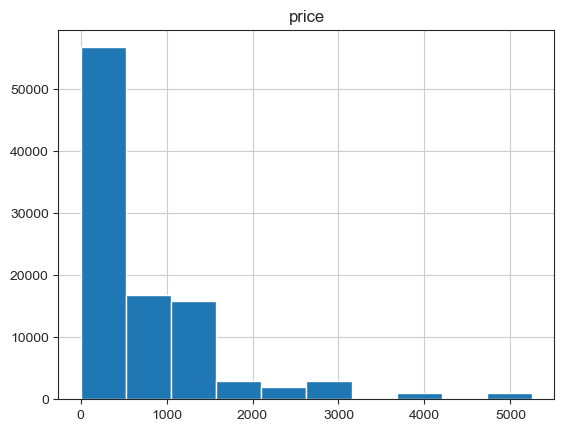

In [48]:
df.hist (['price'])

array([[<Axes: title={'center': 'age'}>]], dtype=object)

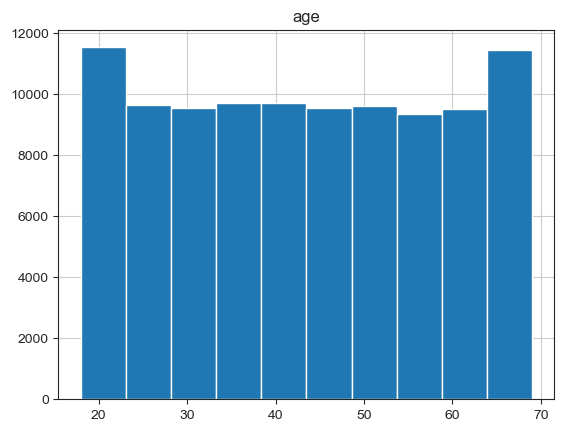

In [49]:
df.hist (['age'])

In [17]:
pd.crosstab(df['category'] ,df['age'])

age,18,19,20,21,22,23,24,25,26,27,...,60,61,62,63,64,65,66,67,68,69
category,,,,,,,,,,,,,,,,,,,,,
Books,106,94,89,88,106,95,109,101,86,87,...,93,95,96,95,103,92,82,104,98,99
Clothing,646,687,641,667,735,626,684,651,662,700,...,679,668,644,654,717,606,643,666,676,650
Cosmetics,267,289,269,289,318,279,268,297,285,289,...,276,310,304,267,296,296,302,273,260,305
Food & Beverage,281,290,292,288,286,307,307,255,274,277,...,264,302,293,261,291,283,303,284,278,255
Shoes,171,207,197,198,188,202,204,183,207,194,...,188,190,211,220,191,190,198,184,181,187
Souvenir,108,86,83,103,103,86,103,96,111,99,...,108,87,95,112,93,98,84,98,88,96
Technology,89,86,77,90,116,85,105,103,87,95,...,111,93,83,81,112,110,96,86,97,92
Toys,176,197,196,224,199,217,197,177,184,209,...,155,200,183,196,199,181,168,206,215,217


C:\Users\pc\AppData\Local\Temp\ipykernel_22168\3234920688.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Density'>

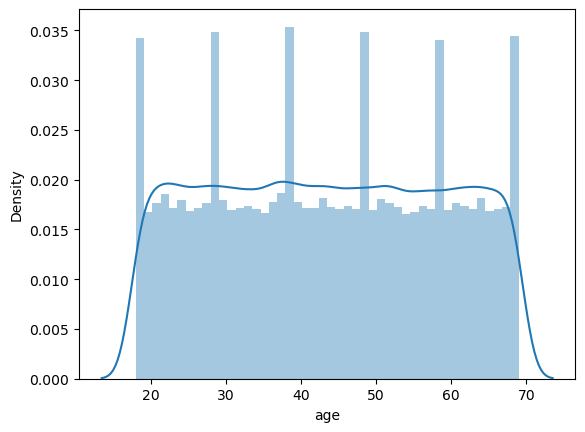

In [18]:
sns.distplot(df['age'])

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

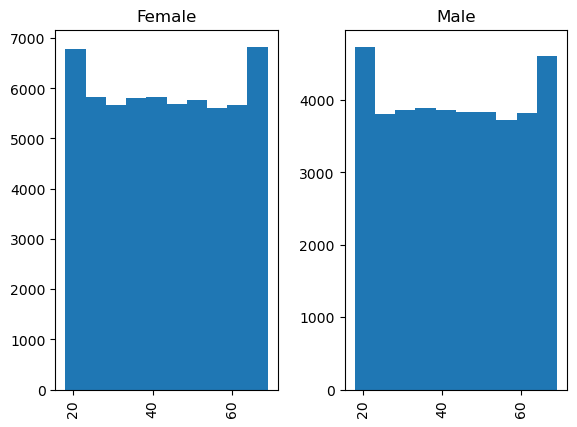

In [9]:
df.hist(by='gender',column='age')

array([<Axes: title={'center': 'Female'}>,
       <Axes: title={'center': 'Male'}>], dtype=object)

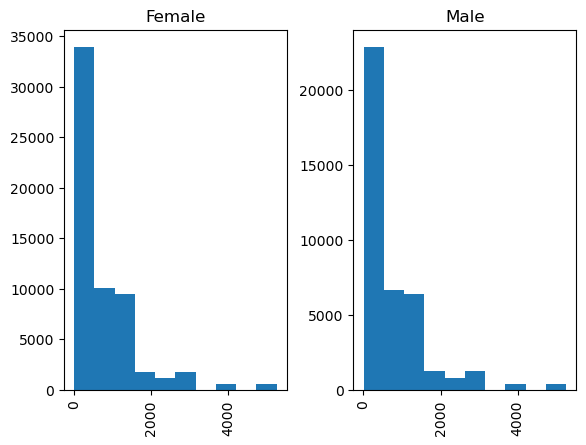

In [10]:
df.hist(by='gender',column='price')

(20.0, 70.0)

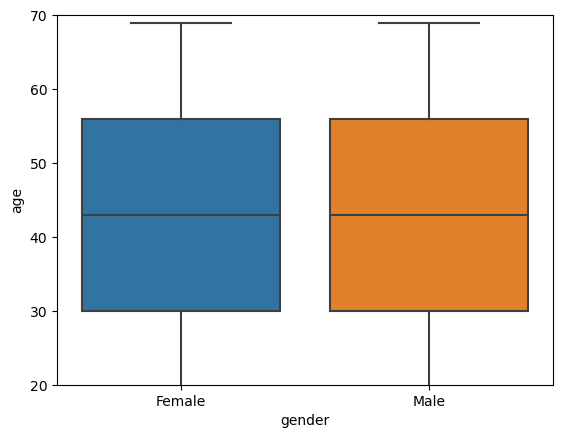

In [15]:
sns.boxplot(x="gender", y="age", data=df)
plt.ylim(20, 70)

<Axes: xlabel='age', ylabel='count'>

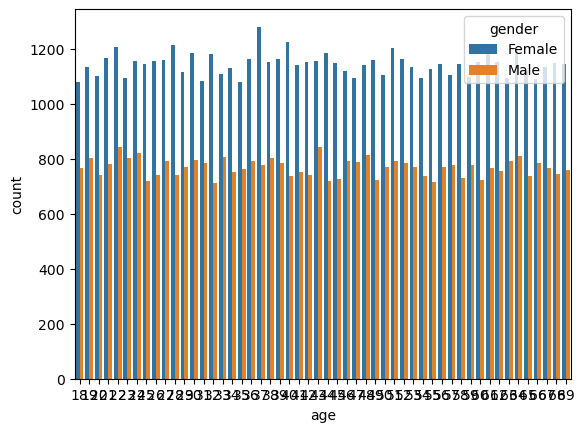

In [21]:
sns.countplot(x="age", hue="gender", data=df)

In [54]:
x = st.skewnorm.rvs(1, size=10000)
# arg1 default is 1 (normal) above that generate right skweed
# and below it will generate left skweed
# the amount of skeeness depend on the number ratio to size 

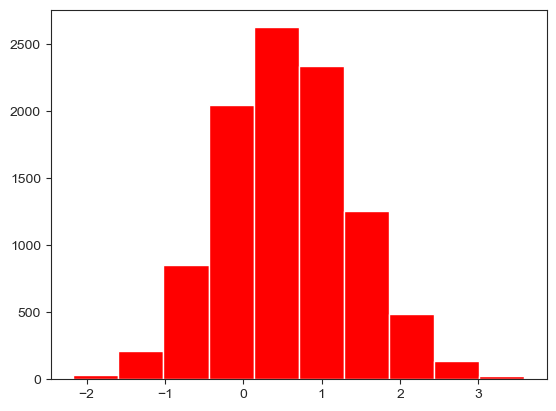

In [55]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'red')

In [56]:
xbar = x.mean()
xbar

0.5636406508995068

In [57]:
np.median(x) 

0.5406593728037374

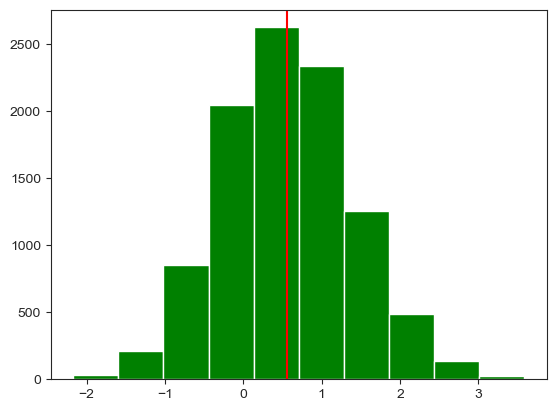

In [58]:
fig, ax = plt.subplots()
plt.axvline(x = x.mean(), color='red')
_ = plt.hist(x, color = 'green')

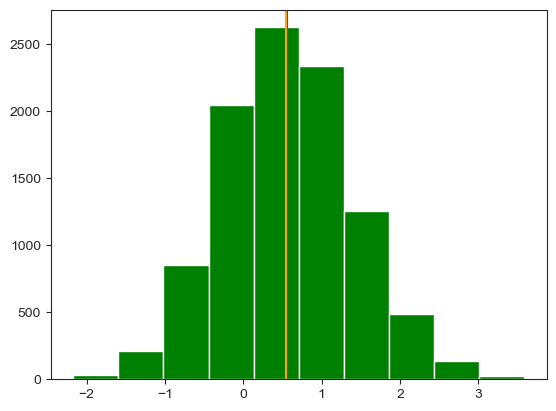

In [59]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='red')
plt.axvline(x = np.median(x), color='orange')
_ = plt.hist(x, color = 'green')

### Measures of Dispersion


In [60]:
x.var()

0.6982791717815445

In [61]:
x.var()**(1/2)

0.8356310021663537

In [62]:
sigma = x.std()
sigma

0.8356310021663537

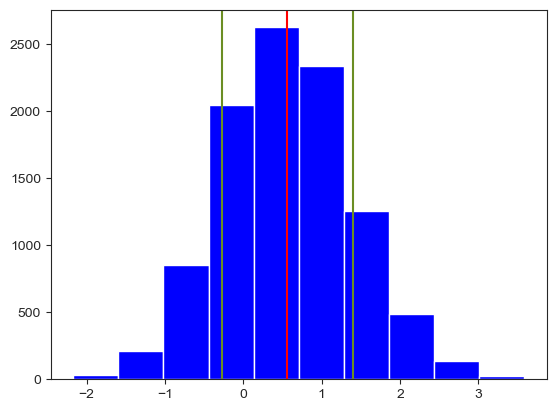

In [63]:
ig, ax = plt.subplots()
plt.axvline(x = xbar, color='red')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'blue')

In [64]:
sigma/(x.size)**(1/2)

0.008356310021663536

In [65]:
st.sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

0.008356727868503394

In [66]:
st.sem(x, ddof=0)

0.008356310021663536

In [67]:

x = np.random.normal(size=10000)

In [68]:
sns.set_style('ticks')

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


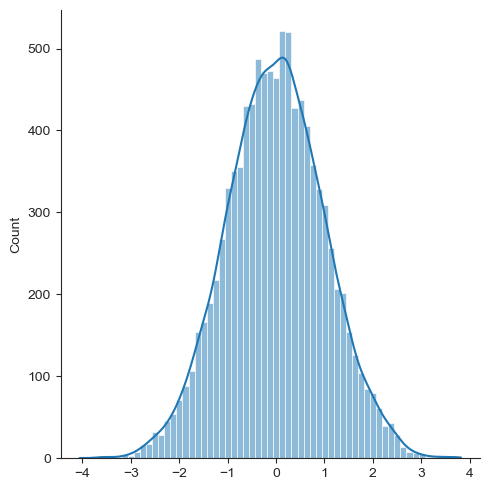

In [69]:
_ = sns.displot(x, kde=True)

In [70]:
x.mean()

-0.005312127685946406

In [71]:
x.std()

1.0120245774037706

In [72]:
x_sample = np.random.choice(x, size=15, replace=False)
x_sample

array([ 0.51245887, -0.50823617,  1.65662793,  0.43576778, -0.21353333,
       -1.92584255, -0.4927915 , -0.32283285, -1.64092385, -1.25876802,
        0.13380733, -1.82067602, -0.18706502,  0.26859997,  0.09496634])

In [73]:
x_sample.mean()

-0.35122940586091644

In [74]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_means.append(sample.mean())
    return sample_means

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


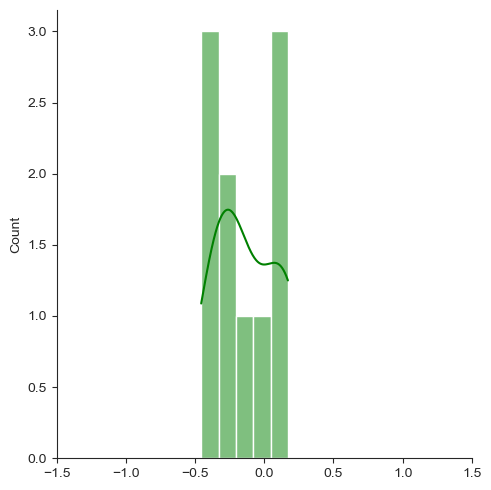

In [75]:
sns.displot(sample_mean_calculator(x, 10, 10), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


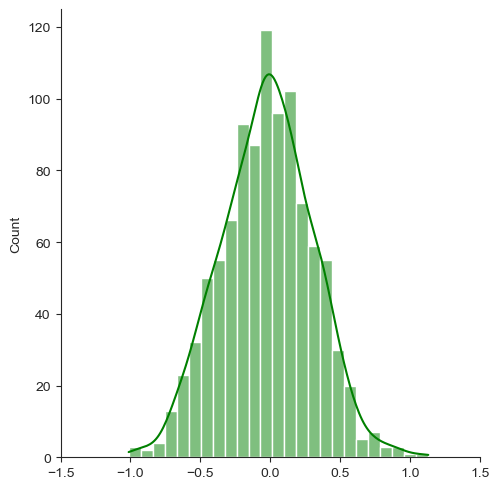

In [76]:
sns.displot(sample_mean_calculator(x, 10, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


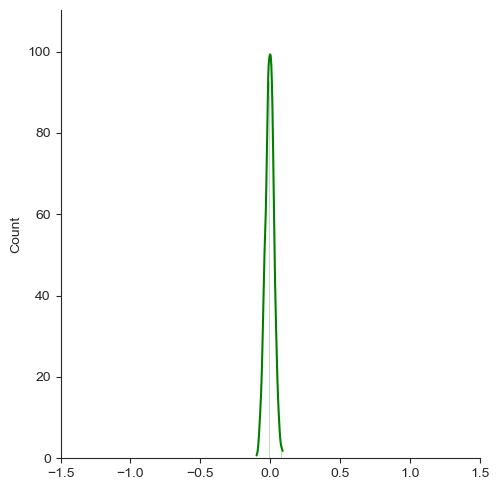

In [77]:
sns.displot(sample_mean_calculator(x, 1000, 1000), color='green', kde=True)
_ = plt.xlim(-1.5, 1.5)

In [78]:
s = st.skewnorm.rvs(10, size=800)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


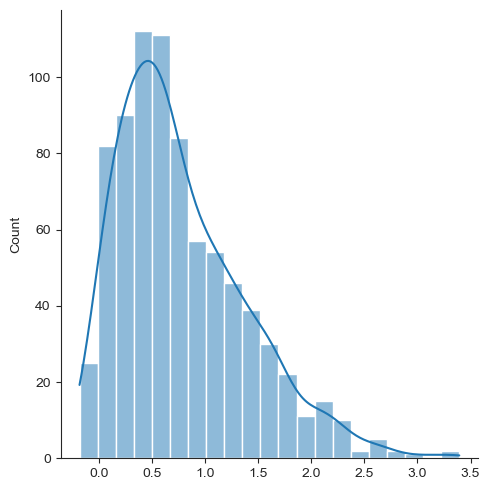

In [79]:
_ = sns.displot(s, kde=True)


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


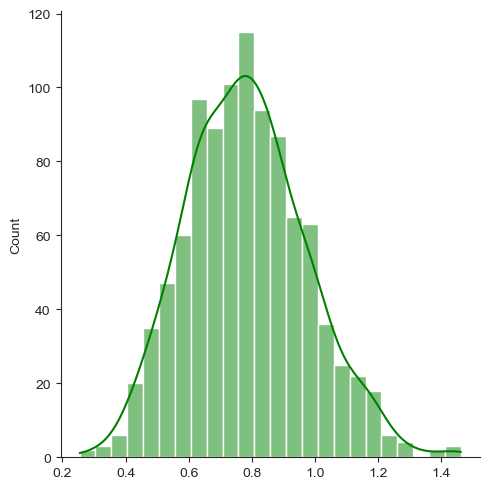

In [80]:

_ = sns.displot(sample_mean_calculator(s, 10, 1000), color='green', kde=True)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


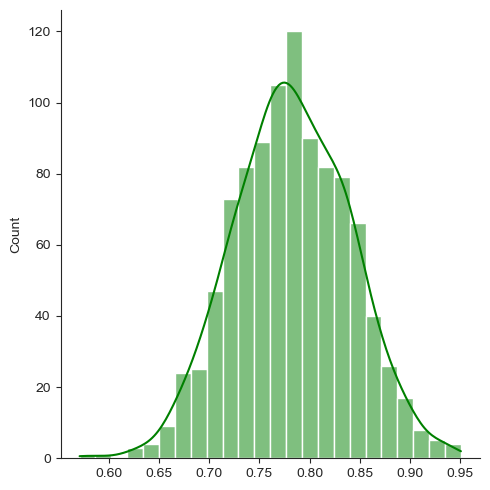

In [81]:
_ = sns.displot(sample_mean_calculator(s, 100, 1000), color='green', kde=True)

In [82]:
m = np.concatenate((np.random.normal(size=8000), np.random.normal(loc = 4.0, size=5000)))

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


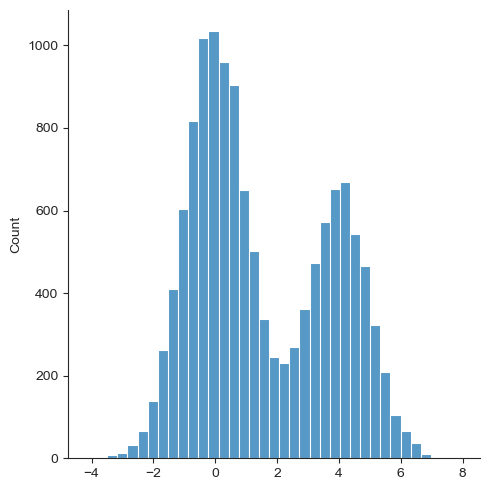

In [83]:
_ = sns.displot(m, kde=False)

# z-scores

In [41]:
x_i = 80
mu = 75
sigma = 3

In [42]:
x = np.random.normal(mu, sigma, 10000)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


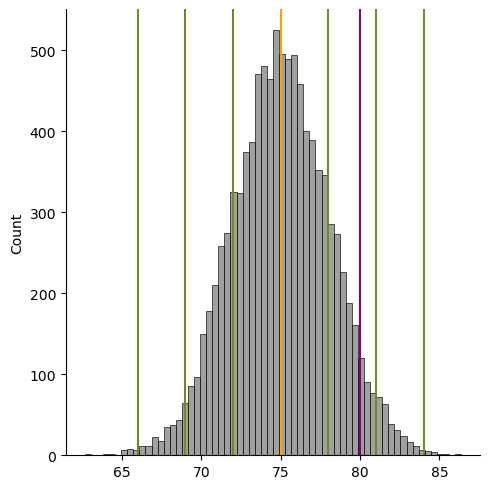

In [43]:
sns.displot(x, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [44]:
z = (x_i - mu)/sigma
z

1.6666666666666667

our Z score is 1.6 sd above mean

In [45]:
z = (x_i - np.mean(x))/np.std(x)
z

1.6210272403876733

In [46]:
len(np.where(x > 80)[0])

521

In [47]:
100*492/10000

4.92

In [48]:
np.percentile(x, 99)

82.20701894376276

In [49]:
mu = 90
sigma = 2

In [50]:

y = np.random.normal(mu, sigma, 10000)

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


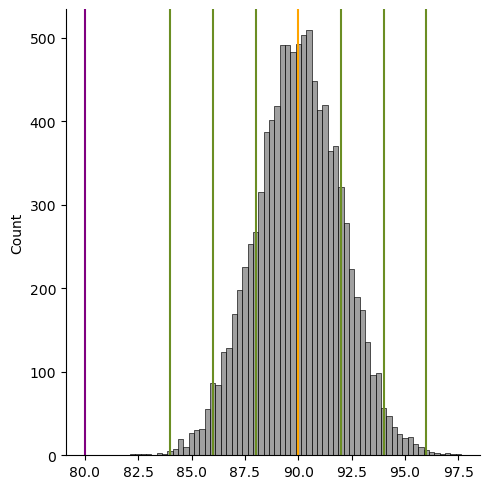

In [51]:
sns.displot(y, color='gray')
plt.axvline(mu, color='orange')
for v in [-3, -2, -1, 1, 2, 3]:
    plt.axvline(mu+v*sigma, color='olivedrab')
_ = plt.axvline(x_i, color='purple')

In [52]:
z = (x_i - mu)/sigma
z


-5.0

-5 sd below mean

<div class="alert alert-block alert-success">
<b>25/4/24</b> 
</div>

# p-scores


In [53]:
p_below = st.norm.cdf(-2.5)
p_below

0.006209665325776132

In [54]:
p_below*10000

62.096653257761325

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


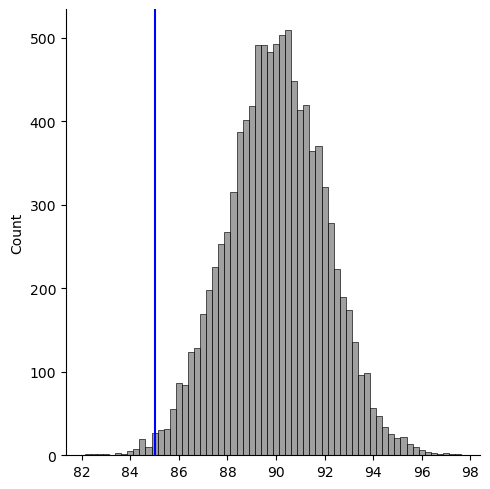

In [55]:
sns.displot(y, color='gray')
_ = plt.axvline(mu-2.5*sigma, color='blue')

In [56]:
st.norm.cdf(2.5)

0.9937903346742238

In [57]:
p_above = 1-st.norm.cdf(2.5)
p_above

0.006209665325776159

In [58]:
p_above*10000

62.09665325776159

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


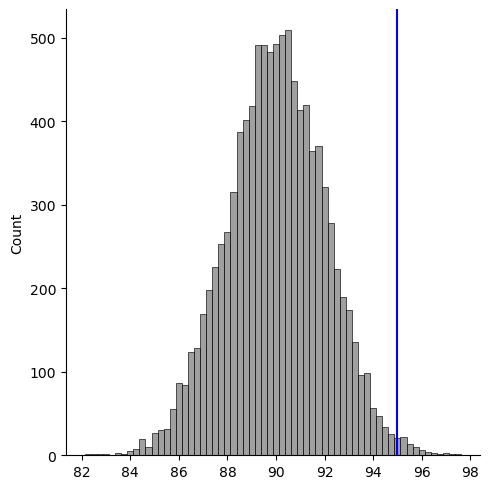

In [59]:
sns.displot(y, color='gray')
_ = plt.axvline(mu+2.5*sigma, color='blue')

In [61]:
p_outside = p_below + p_above
p_outside

0.01241933065155229

In [62]:
p_outside*10000

124.1933065155229

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


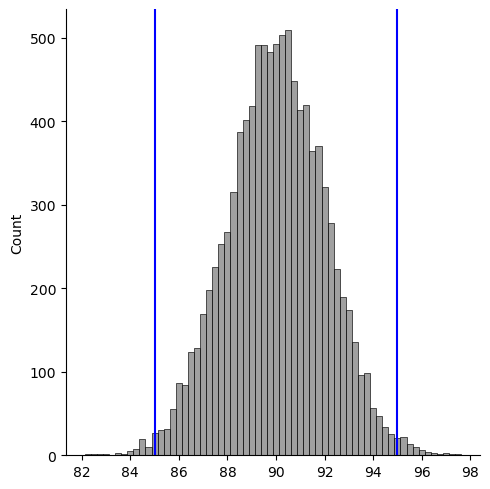

In [63]:
sns.displot(y, color='gray')
plt.axvline(mu+2.5*sigma, color='blue')
_ = plt.axvline(mu-2.5*sigma, color='blue')

compareing mean with t-scoe
html

In [64]:
x = [50, 70, 84, 90]

In [65]:
xbar = np.mean(x)
xbar

73.5

In [67]:
sx = st.sem(x)
sx

8.88350531415762

In [68]:
t = (xbar-50)/sx
t

2.645352163244402

In [70]:
# my_n is number of observation that you wnat to compare it to the mean

def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1) # 2nd arg to t.cdf() is "degrees of freedom"

In [71]:
# when p_value is <0.5 mean the provided observation
# is not significantly differ from the provided mean
p_from_t(t, len(x))

0.07730070297314764

In [73]:
st.ttest_1samp(x, 50)

TtestResult(statistic=2.6453521632444024, pvalue=0.07730070297314762, df=3)

In [30]:
np.unique(df.shopping_mall, return_counts=True)

(array(['Cevahir AVM', 'Emaar Square Mall', 'Forum Istanbul',
        'Istinye Park', 'Kanyon', 'Mall of Istanbul', 'Metrocity',
        'Metropol AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object),
 array([ 4991,  4811,  4947,  9781, 19823, 19943, 15011, 10161,  4914,
         5075], dtype=int64))

In [32]:
us = df[df.shopping_mall == 'Metrocity']

In [33]:
us

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
10,I306368,C240286,Female,36,Food & Beverage,2,10.46,Cash,25/12/2022,Metrocity
12,I640508,C225330,Female,67,Toys,4,143.36,Debit Card,31/07/2022,Metrocity
16,I294687,C300786,Male,65,Books,2,30.30,Debit Card,16/01/2021,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99405,I651573,C425890,Male,56,Shoes,3,1800.51,Debit Card,2/8/2022,Metrocity
99408,I949512,C217355,Female,47,Clothing,2,600.16,Credit Card,21/02/2021,Metrocity
99424,I549710,C541824,Female,34,Technology,3,3150.00,Cash,13/01/2021,Metrocity
99433,I403904,C142643,Male,28,Toys,1,35.84,Credit Card,2/11/2022,Metrocity


In [35]:
np.unique(us.age, return_counts=True)

(array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
        69], dtype=int64),
 array([286, 292, 267, 289, 302, 274, 293, 275, 273, 326, 314, 272, 300,
        269, 281, 282, 331, 259, 264, 315, 267, 285, 300, 266, 302, 313,
        304, 307, 282, 297, 285, 260, 285, 332, 284, 290, 274, 279, 296,
        296, 288, 293, 258, 306, 281, 313, 314, 271, 260, 301, 264, 294],
       dtype=int64))

(20.0, 60.0)

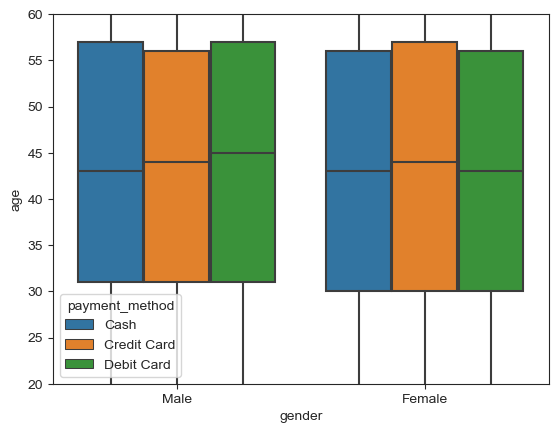

In [40]:
_ = sns.boxplot(x='gender', y='age', hue='payment_method', data=us)
plt.ylim(20, 60)